# Seaborn

## Relational/ Statistical Plots

Relational Plots are used to perform multivariate analysis.
1. Scatter Plots 
2. Line Plots (Used for timeseries data)
3. FacetGrids (Plotting Multiple Graphs side by side)

## Scatter Plots
It depicts joint distribution of any two variables. They can give you high-level overview of a big distribution of data.
Mainly only used to plot numeric data.

Seaborn has good cutomisation on graphs - hue, size and style.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# you can import certain styles to make the graphs look pretty in seaborn
plt.style.use('fivethirtyeight')

In [6]:
# load a dummy dataset
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


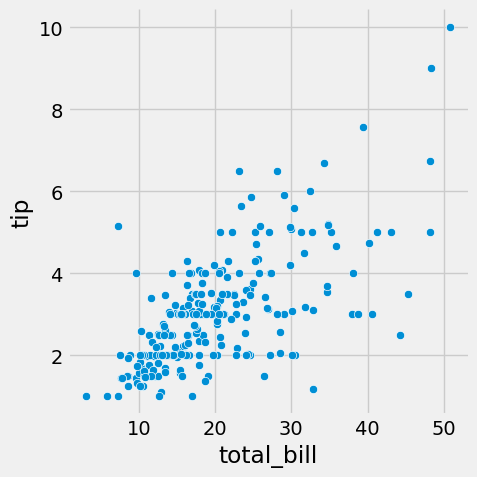

In [25]:
# plotting a Scatter Plot between total_bill and tip
sns.relplot(x='total_bill', y='tip', data=data, kind='scatter')
# simply specify the X, Y and the data, the kind='scatter' is the default

# relplot - means Relational Plot

### Using Hue
This will change the scatter "point color"

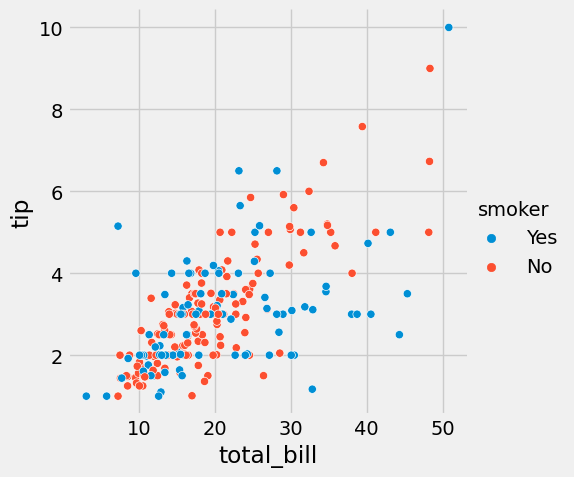

In [12]:
# suppose you want the scatter points to show if the person is a smoker or not
sns.relplot(x='total_bill', y='tip', data=data, hue='smoker')

### Using STYLE
This will chage the scatter "point shape"

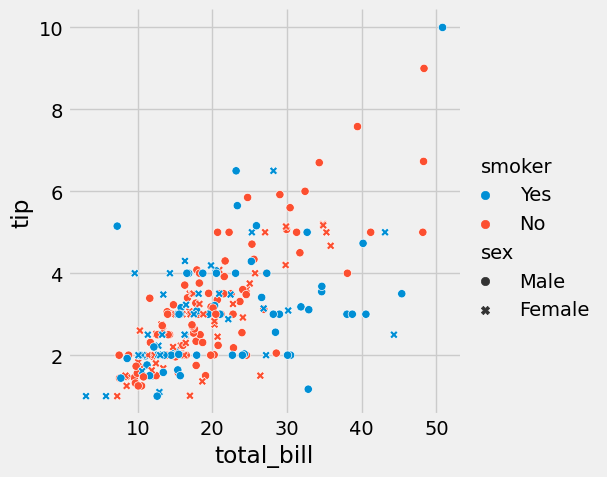

In [15]:
# now you want to differentiate if the person was male/female
sns.relplot(x='total_bill', y='tip', data=data, hue='smoker', style='sex')

### Size Parameter
Unlike Hue and Style (they work on categorical data), this works on discrete continous/non-continous data.

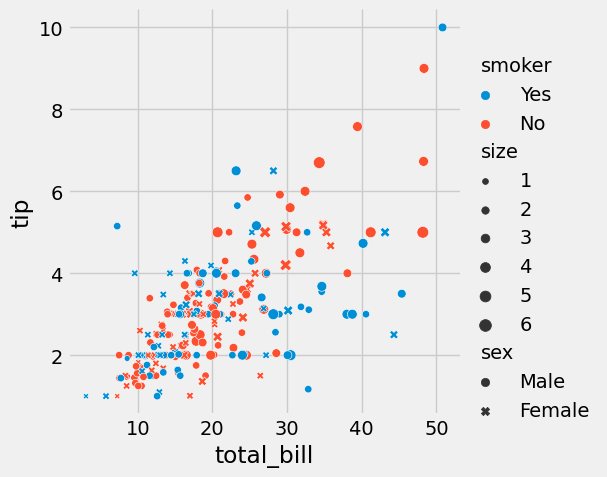

In [18]:
# Lets use the table size, using this changes the "pointer size"
sns.relplot(x='total_bill', y='tip', data=data, hue='smoker', style='sex', size='size')

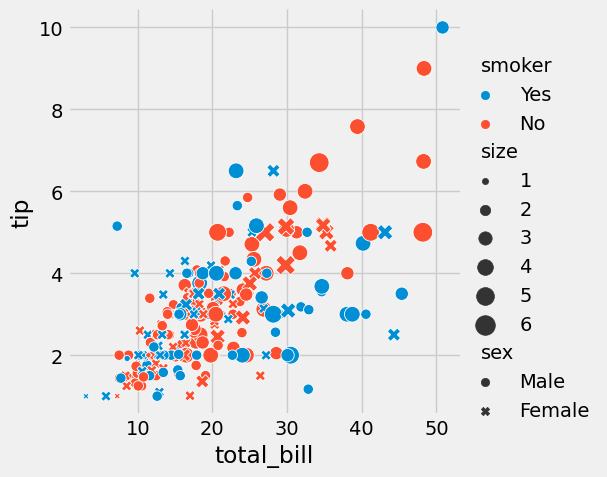

In [21]:
# you can further control these sizes by using the "sizes=" parameter
sns.relplot(x='total_bill', y='tip', data=data, hue='smoker', size='size', sizes=(20, 200), style='sex')
# this takes a tuple input and normalises the numeric range and decides the sizes

### Directly using Scatter Plot Function
This does exactly the same thing as relplot, the difference is that it can plot only scatter plots. But you can use this if you want to remeber more.

<Axes: xlabel='total_bill', ylabel='tip'>

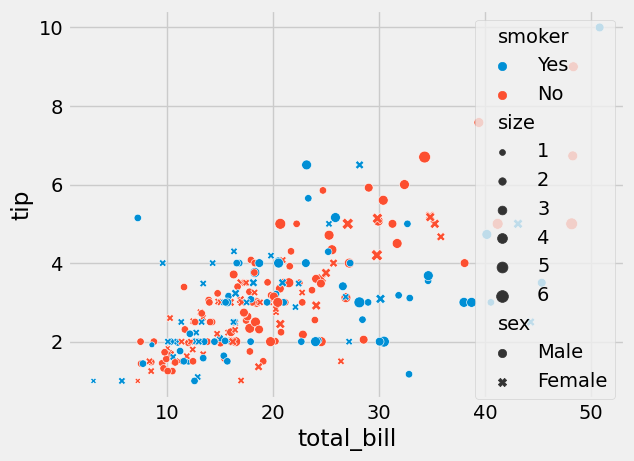

In [23]:
sns.scatterplot(x='total_bill', y='tip', data=data, hue='smoker', style='sex', size='size')
# THe legend appears inside the graph, but in relplot it appears on the side of the graph

## Plotting with Categirical Data

### 1. Categorical Scatterplots
    > a. Stripplot
    > b. Swarmplot

Here, atleast one variable is Categorical in Nature.

    > x-axis --> Categorical Data
    > y-axis --> Nmberical Data



#### Stripplot

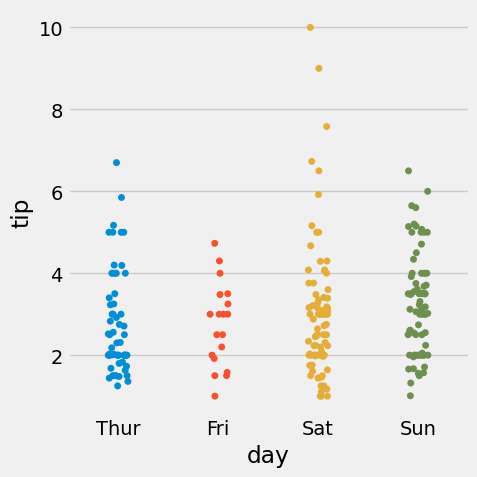

In [44]:
# still using the "tip" dataset
# strip plot - displays data in a strip like visual
sns.catplot(x='day', y='tip', kind='strip', data=data, jitter=0.1, hue='day')
# this method uses a prarmeter called 'jitter' -- introduces a noise

#### Swarmplot

c:\Dev\Conda\envs\ds\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Dev\Conda\envs\ds\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


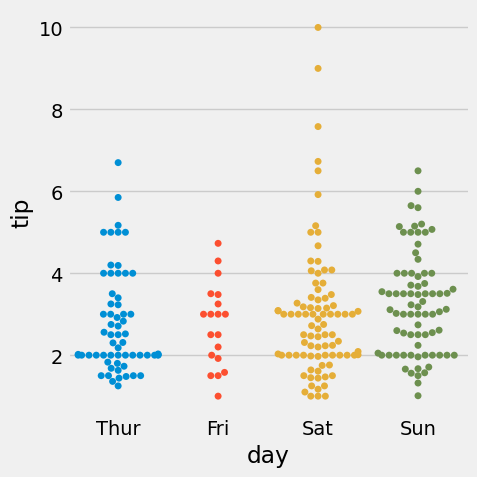

In [40]:
# swarm plot - places the equal values beside each other to signify distribution
sns.catplot(x='day', y='tip', data=data, kind='swarm', hue='day')

c:\Dev\Conda\envs\ds\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Dev\Conda\envs\ds\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


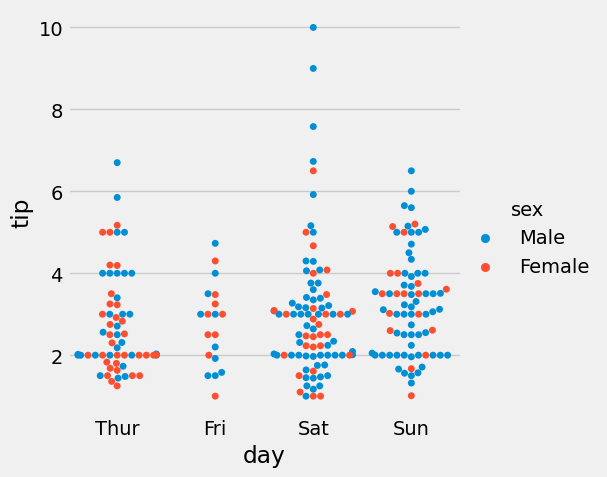

In [43]:
sns.catplot(x='day', y='tip', data=data, kind='swarm', hue='sex')
# there is no such thing as style and size in stripplot

### 2. Categorical Distribution Plots
    > a. Boxplot
    > b. Violinplot

### Boxplots

A boxplot is a standardised way of displaying the distribution of data based on a five number summary. This uses the Q1 Q2 Q3 values. The minimum and maximum are calculated based on the IQR(Inter-Quartile Range)

    Minimum = Q1 - 1.5IQR
    Maximum = Q3 + 1.5IQR

With this you can also somewhat makeout the outliers

<Axes: >

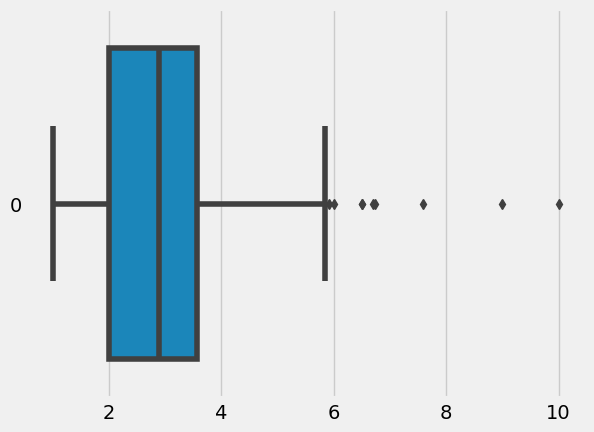

In [49]:
# This is mostly used in cases like univariate analysis
sns.boxplot(data['tip'], orient='h')
# default orientation is veritcal

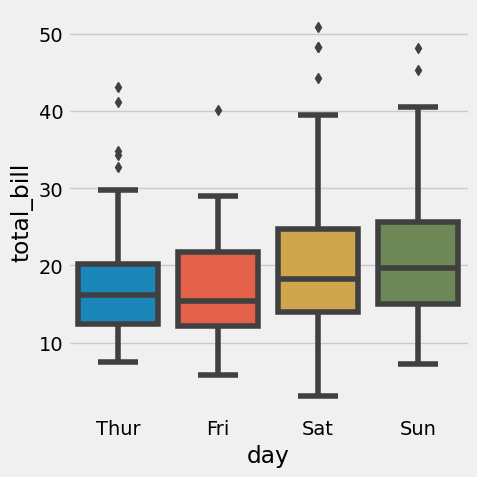

In [54]:
# when doing multi-variate analysis, pass the kind= "box"
sns.catplot(x='day', y='total_bill',data=data, kind='box')
# plots a box-distribution plot on the categorical data 'day'

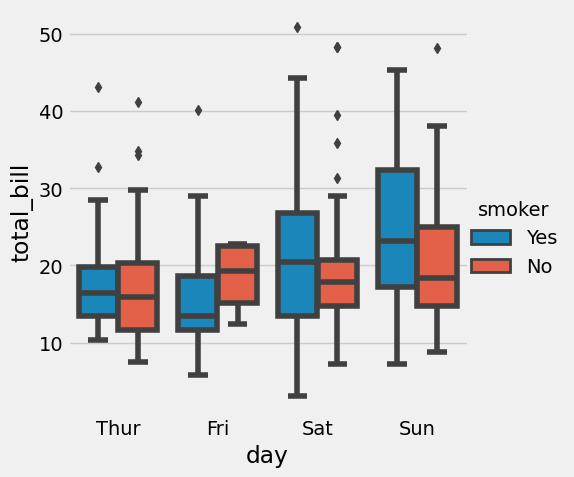

In [56]:
# you can further pass 'hue' to further categorise the data
sns.catplot(x='day', y='total_bill', data=data, hue='smoker', kind='box')

### Violin Plot

These are mainly used for plotting numeric data and can be considered Boxplot with a kernel density plot.

It is like you took a normal distribution curve made it horizontal and mirrored it, but now you have lines for median, IQR and Min and Max.

It is often used to see the distribution of a given variable across some categories

<Axes: >

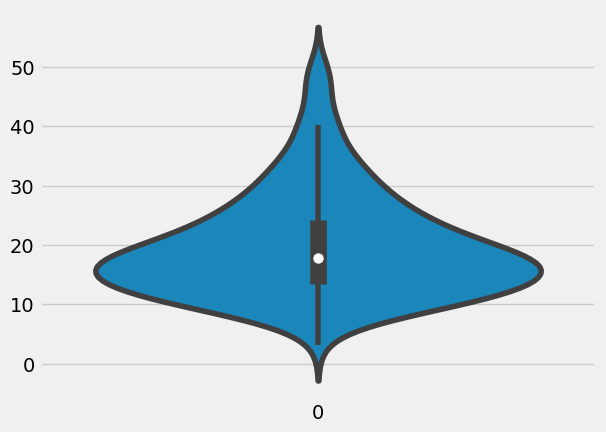

In [58]:
# only for one variable
sns.violinplot(data['total_bill'])

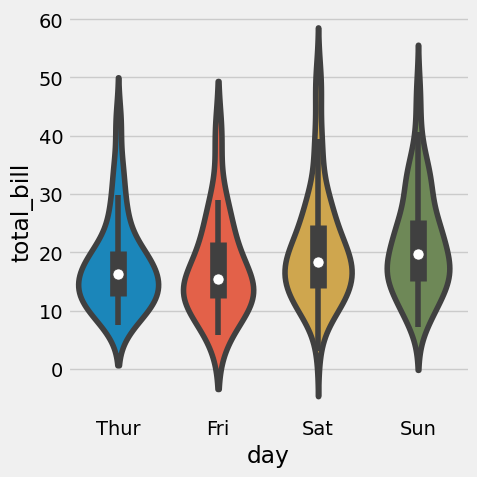

In [61]:
# when you are plotting voilin across categories
sns.catplot(x='day', y='total_bill', kind='violin', data=data)

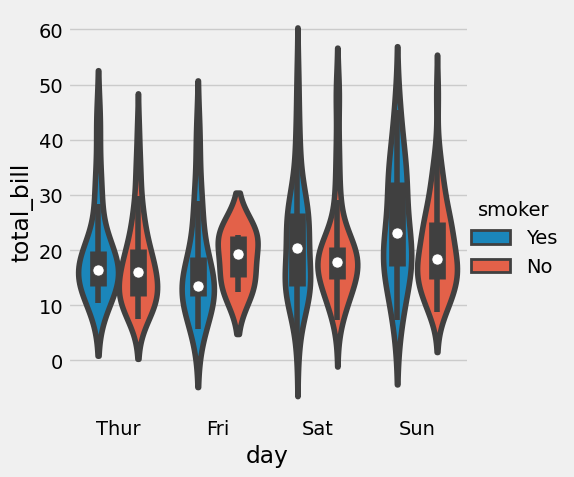

In [63]:
# when you further add hue to the plot
sns.catplot(x='day', y='total_bill', data=data, kind='violin', hue='smoker')
# note that this looks very cluttered

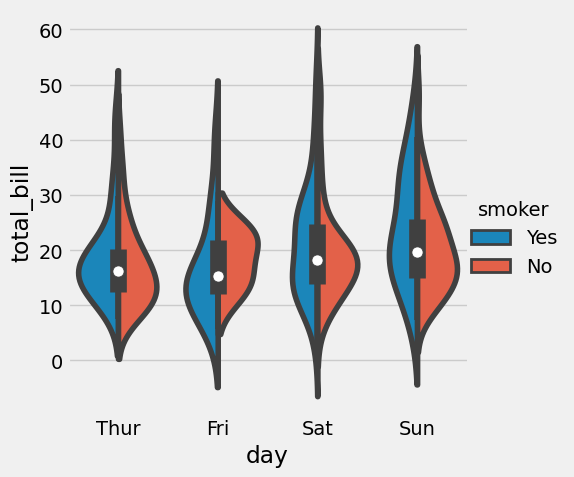

In [65]:
# to reduce clutter, use the "split=True" parameter to generate asymmetric violin plots
sns.catplot(x='day', y='total_bill', data=data, kind='violin', hue='smoker', split=True)

### Barplots and Countplots

Find the mean value of total_bill for smoker and non-smoker

#### Barplots

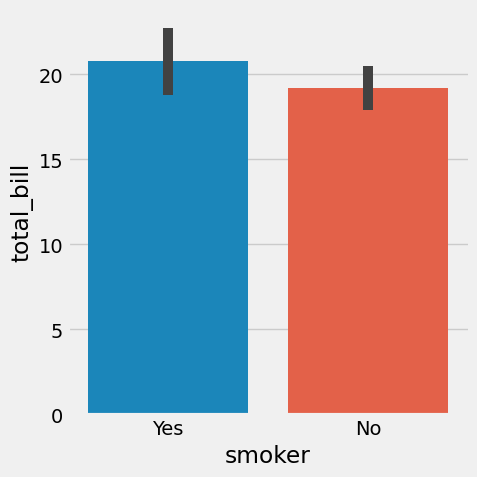

In [71]:
sns.catplot(x='smoker', y='total_bill', kind='bar', data=data)
# the average mean of smoker's total bill is a bit higher than non-smoker
# the black bars are the error bars - the length of the bar signifies the confidence range
# the mean can lie the range of the black bar with Confidence = 95% (default)

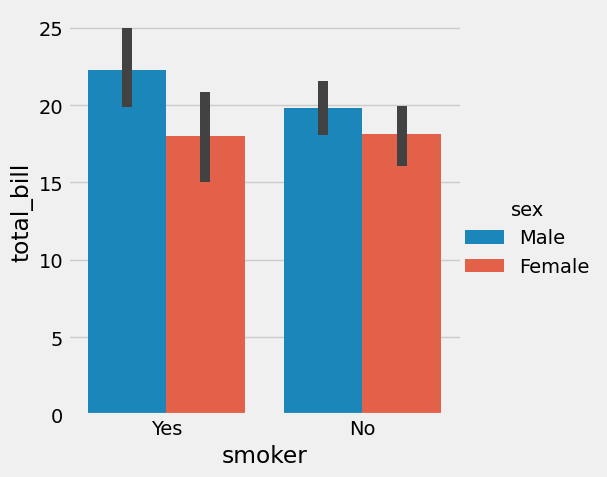

In [74]:
sns.catplot(x='smoker', y='total_bill', kind='bar', data=data, hue='sex')
# further using the hue parameter

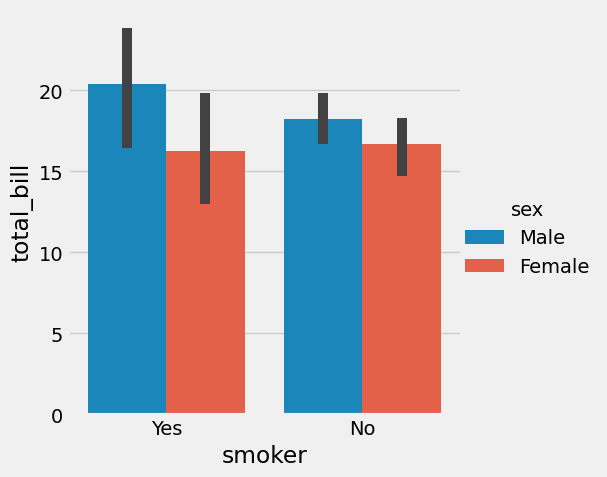

In [79]:
# suppose you want to estimate the median instead of the mean(default)
# pass the =estimator paramter as np.median
# you can similarly pass any other function --- np.var, np.std , etc.
sns.catplot(x='smoker', y='total_bill', kind='bar', data=data, hue='sex', estimator=np.median)

#### Countplots (A Special Bar Graphs)

Works very similar to Histograms

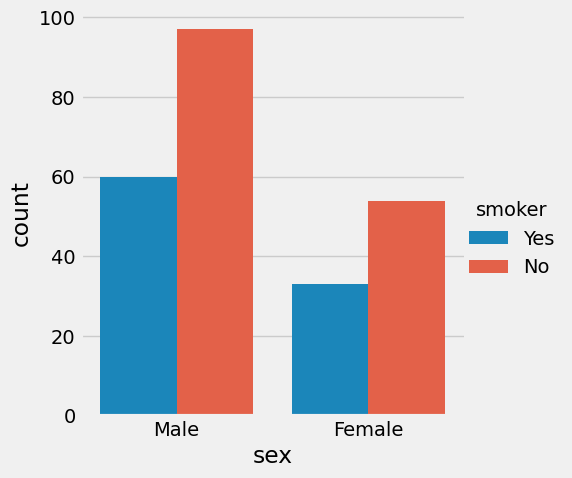

In [84]:
sns.catplot(x='sex', kind='count', data=data, hue='smoker')
# plots the count of categorical data

#### Heatmaps

In [87]:
# once again inbuilt dataset
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [90]:
# heatmaps need a pivot table input, so create one
pivot = flights.pivot_table(index='year', columns='month', values='passengers', aggfunc='sum')

<Axes: xlabel='month', ylabel='year'>

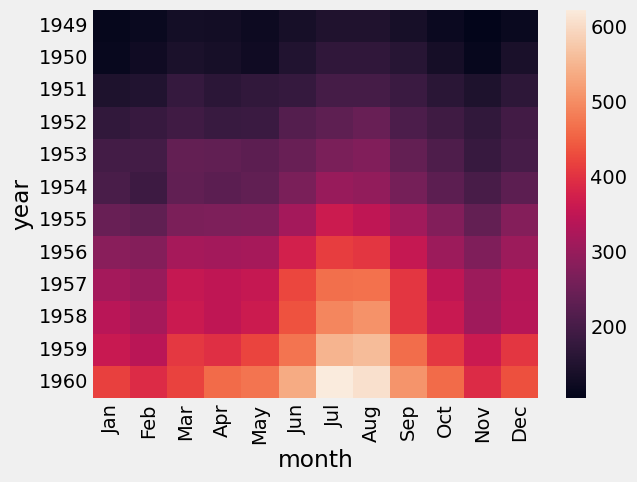

In [96]:
sns.heatmap(pivot)
# cbar at the side shows the numeric equivalent of color
sns.heatmap(pivot, cbar=False)

<Axes: xlabel='month', ylabel='year'>

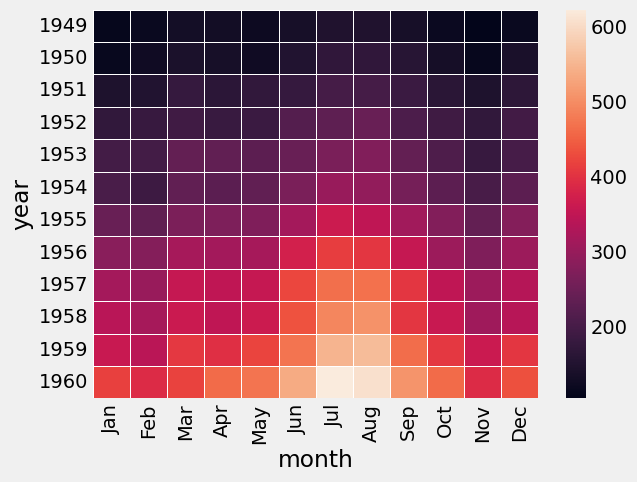

In [98]:
# you can control certain parameters about the heatmap such as the distance between squares
sns.heatmap(pivot, linewidths= 0.5)

<Axes: xlabel='month', ylabel='year'>

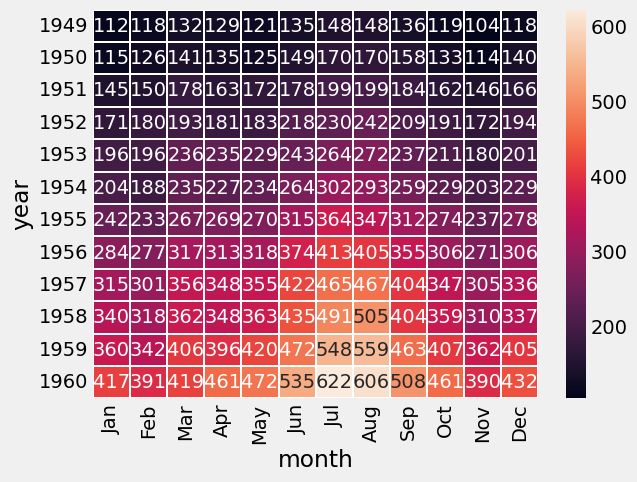

In [100]:
# you can annotate every cell using the annot= parameter and datatype using the fmt=
sns.heatmap(pivot, linewidths= 0.1, annot=True, fmt='d')

<Axes: xlabel='month', ylabel='year'>

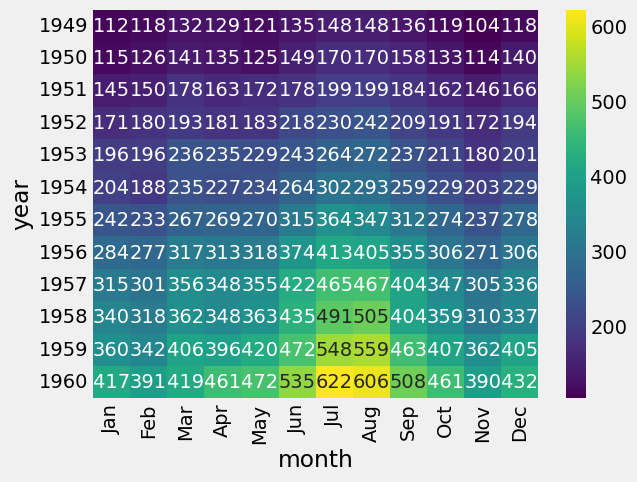

In [103]:
# you can change the color mapping using the cmap+ paramter
sns.heatmap(pivot, annot=True, fmt='d', cmap='viridis')
# fmt='d' means the values show up as integers, cmap='viridis' one of many color codes
# cmap= ex --- summer, winter, etc.

#### Clustemaps

It is basically a Clustermap, but now the similar rows will be clustered.

Clustering happens based on a parameter called "metric=". Default is 'euclidian', but there are other mtrics like yshift, correlations, etc. (This helps when you know Machine Learning)

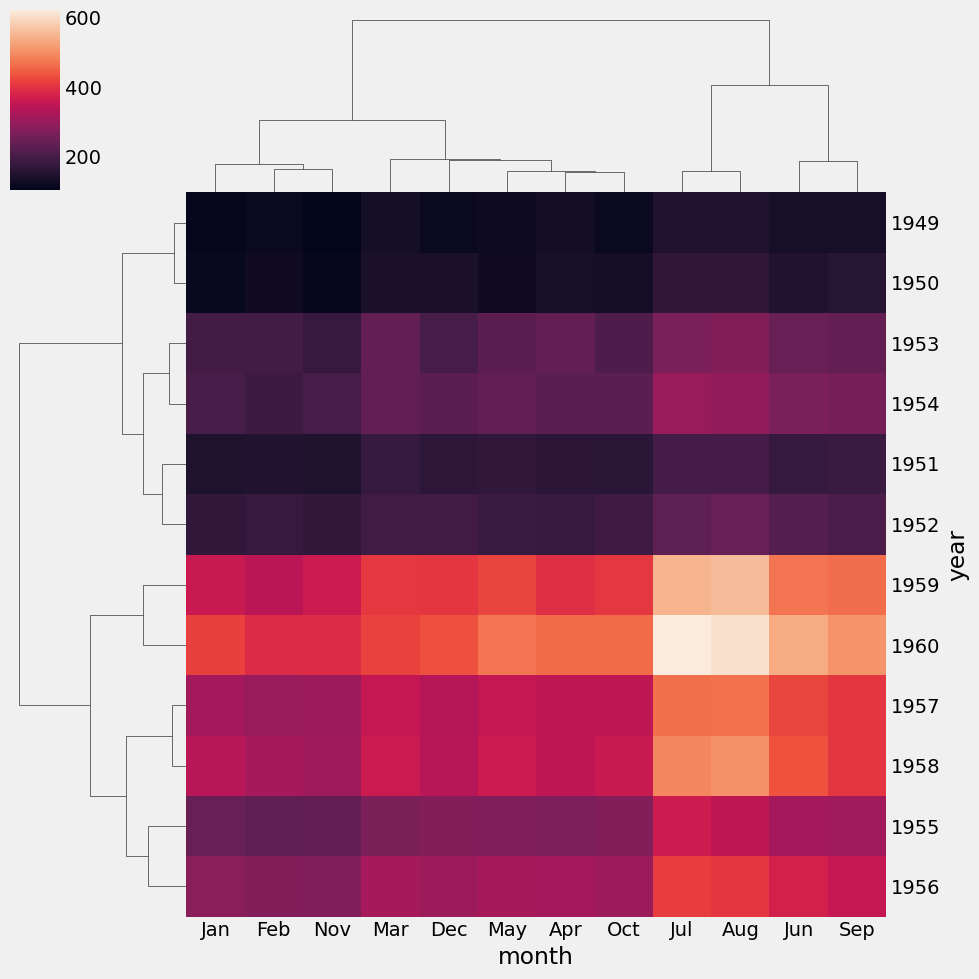

In [107]:
sns.clustermap(pivot)
# notice that the order of the month is not really accurate

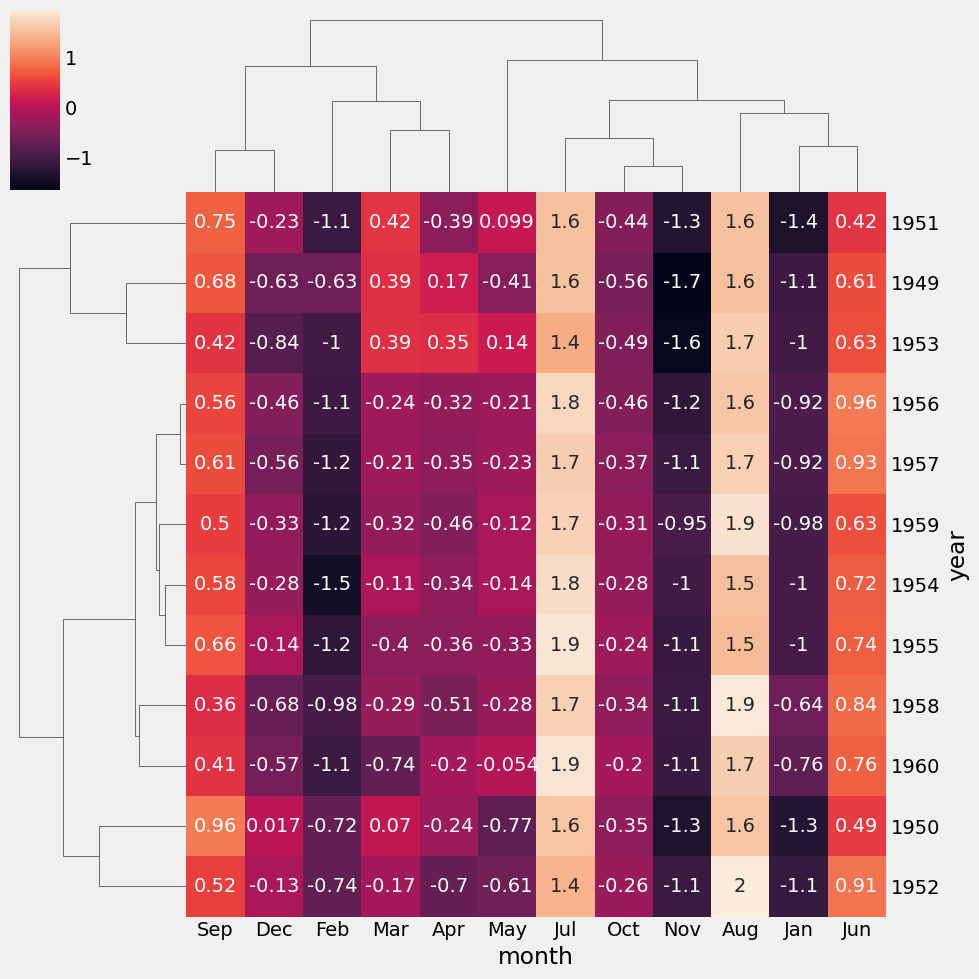

In [109]:
# You can further Normalise the values using the z_score= parameter
sns.clustermap(pivot, z_score=0, annot=True, metric='correlation')

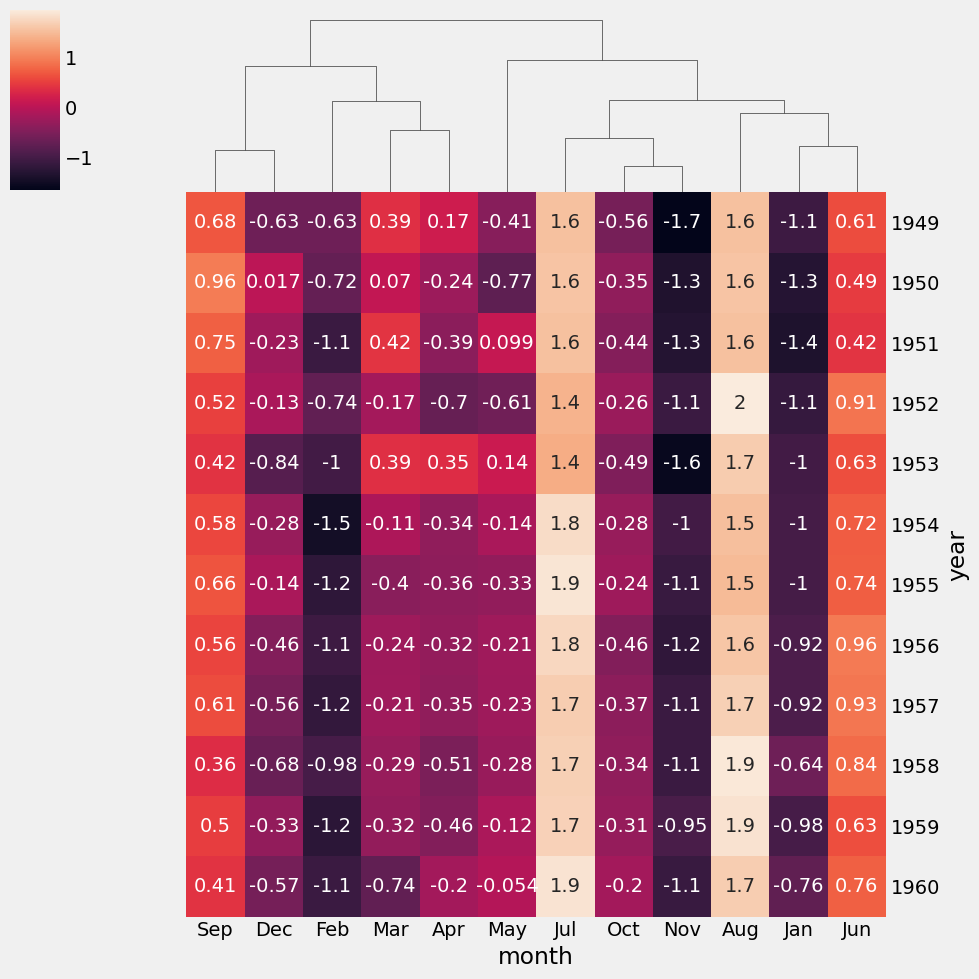

In [113]:
# you can also selectively cluster only rows or columns using cluster_rows=False or cluster_columns=True
sns.clustermap(pivot, z_score=0, annot=True, row_cluster=False, metric='correlation')